In [64]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Train.csv')

In [3]:
data.head()

,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,12554,current,M,35,708,24893.00,378.00,10288.00,29664.00,16291.40,...,40.0,24563.0,30051.32,12761.0,2.0,65.0,50836.0,Y,1674.09,20014.0
1,17645,current,M,35,123,18941.62,966.00,20672.00,287.00,4217.00,...,78.0,23948.0,42119.05,76206.0,21.0,63.0,23226.0,Y,13043.34,10173.0
2,7604,current,M,55,802,5678.87,2724.00,1964.50,3933.11,23956.25,...,82.0,10752.0,58373.25,75283.0,7.0,1.0,27036.0,Y,25375.27,16095.0
3,1590,current,F,29,867,30489.50,1236.00,12609.88,9138.14,17521.00,...,38.0,12607.0,69851.51,68708.0,21.0,83.0,43037.0,Y,3544.33,7707.0
4,16556,current,M,34,802,7441.40,6906.04,4364.00,1939.00,2121.00,...,50.0,25213.0,10071.00,80140.0,8.0,32.0,32044.0,Y,12780.44,96408.0


In [4]:
data.shape

(15000, 44)

In [5]:
data.drop('ID', axis=1, inplace=True)

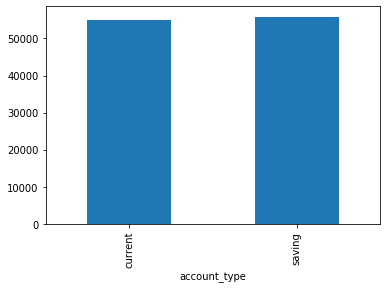

In [53]:
data.groupby('account_type')['cc_cons'].mean().plot(kind='bar')

### there is not much effect of account type and average credict card consumption for the next 3 months

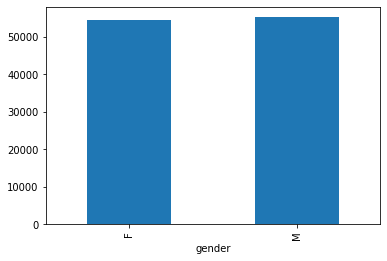

In [54]:
data.groupby('gender')['cc_cons'].mean().plot(kind='bar')

In [63]:
data.groupby('vehicle_loan_closed')['cc_cons'].sum()

vehicle_loan_closed
1.0    827365948.0
Name: cc_cons, dtype: float64

In [28]:
data_cat = pd.get_dummies(data=data, columns=['account_type', 'gender','loan_enq'])
data_cat.drop(['loan_enq_Y','region_code'], axis=1, inplace=True) #loan_enq only one value so not useful to the model

In [29]:
data_cat.columns

Index(['age', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'personal_loan_active', 'vehicle_loan_active',
       'personal_loan_closed', 'vehicle_loan_closed', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'max_credit_amount_jun', 'emi_active', 'cc_cons',
       'account_type_current', 'account_type_saving', 'gender_F', 'gender_M'],
      dtype='object')

In [40]:
data_cat['age'].value_counts().sort_values()

65       10
54       25
221      41
219      47
220      52
61       67
69       72
120      83
67       93
118      99
222     101
25      106
223     111
51      116
39      136
50      141
49      159
63      165
64      187
56      195
31      213
36      215
58      323
38      340
44      340
46      367
55      393
29      453
40      464
62      474
60      476
27      517
28      534
34      582
42      602
30      709
37      719
66      731
35      758
53      764
32      809
47      921
33     1290
Name: age, dtype: int64

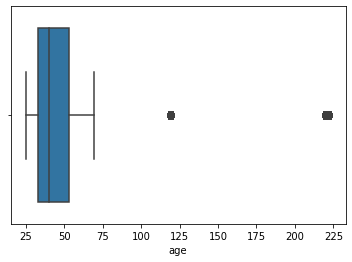

In [51]:
sns.boxplot(x=data_cat['age'])

In [52]:
data_cat = data_cat[data_cat['age'] < 100]
data_cat

,age,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,account_type_current,account_type_saving,gender_F,gender_M
0,35,24893.000,378.00,10288.00,29664.00,16291.400,11432.00,2.0,26.0,10.0,...,12761.00,2.0,65.0,50836.00,1674.09,20014.0,1,0,0,1
1,35,18941.620,966.00,20672.00,287.00,4217.000,885.00,1.0,7.0,13.0,...,76206.00,21.0,63.0,23226.00,13043.34,10173.0,1,0,0,1
2,55,5678.870,2724.00,1964.50,3933.11,23956.250,5168.00,43.0,32.0,102.0,...,75283.00,7.0,1.0,27036.00,25375.27,16095.0,1,0,0,1
3,29,30489.500,1236.00,12609.88,9138.14,17521.000,13650.30,53.0,1.0,50.0,...,68708.00,21.0,83.0,43037.00,3544.33,7707.0,1,0,1,0
4,34,7441.400,6906.04,4364.00,1939.00,2121.000,6829.18,67.0,47.0,82.0,...,80140.00,8.0,32.0,32044.00,12780.44,96408.0,1,0,0,1
5,27,2328.220,1597.54,19979.75,1045.85,11686.255,628.00,6.0,7.0,59.0,...,199925.50,2.0,35.0,17284.00,5026.50,130263.0,1,0,0,1
6,32,1643.810,5009.13,8921.62,2151.00,6677.955,1185.00,10.0,2.0,5.0,...,200391.00,58.0,12.0,6779.00,1534.93,113479.0,1,0,0,1
7,28,5768.500,1963.00,84272.63,1956.00,6794.460,1225.00,26.0,1.0,59.0,...,7422.00,5.0,58.0,56900.00,14689.56,7463.0,1,0,0,1
8,67,721.000,2405.90,28933.37,5672.00,21473.000,1009.00,92.0,34.0,84.0,...,10425.53,2.0,79.0,12626.00,4583.09,5712.0,1,0,1,0
9,37,48575.240,4003.80,2112.49,2572.00,15782.520,5623.40,6.0,4.0,87.0,...,49972.50,2.0,63.0,18524.00,16839.22,7647.0,1,0,0,1


In [65]:
def skewplot(data):
    plt.figure(figsize=(7,200))
    for i in range(len(data.columns)):
        plt.subplot(41,1,i+1)
        data.iloc[:,i].plot(kind='hist')
        plt.xlabel(data.columns[i],size=15)

In [66]:
#function for dropping columns
def drop_col(df,col):
    #col = [""]
    for col in cols:
        if col in df.columns:
            df.drop(col, axis = 1)
    return df